# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP2. Este Jupyter Notebook debe estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
# Primero instalamos las librerías necesarias para leer y manipular la base de datos
%pip install pyod

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Abrimos la carpeta donde se encuentra la base de datos
os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP2")
# Guardamos la base de datos en la variable df y mostramos las primeras 5 filas
df = pd.read_csv("Base Airbnb NY.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [3]:
# Ahora sí, comenzamos a limpiar. Primero revisamos si hay valores duplicados y los eliminamos.
# Antes, queremos saber cuantas filas tiene la base original, para ello usamos la función shape.
df.shape

(48905, 16)

#### 1. Tengan en cuenta si hay valores duplicados y eliminénlos.

In [4]:
df = df.drop_duplicates() # La función drop_duplicates elimina los valores duplicados
df.shape # Ahora vemos que la base tiene 48895 filas, es decir, habían 10 filas duplicadas.


(48895, 16)

#### 2. Eliminen las columnas que no tienen información de interés.

In [5]:
# Segundo, eliminamos las columnas que no tienen información de interés.
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review'])
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


#### 3. Decidan qué hacer con los missing values e implementen su decision.

In [6]:
# Tercero, imputamos los missing values de las columnas correspondientes.
# Primero, vemos cuántos missing values hay en cada columna.
df.isnull().sum()
# Vemos que hay missing values en las columnas 'price' (15) y 'reviews_per_month' (10052).

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data
However, if your purpose is prediction, you would want your standard error to be reduced by including information (non-missing data) on other variables of a data point. Then imputation could be the tool that you’re looking for.

https://www.machinelearningplus.com/machine-learning/mice-imputation/

In [7]:
#Dado que no sabemos si los missing values son aleatorios o no, decidimos imputarlos con la mediana.
df['price'] = df['price'].fillna(df['price'].median())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
df.isnull().sum()


neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### 4. Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. 

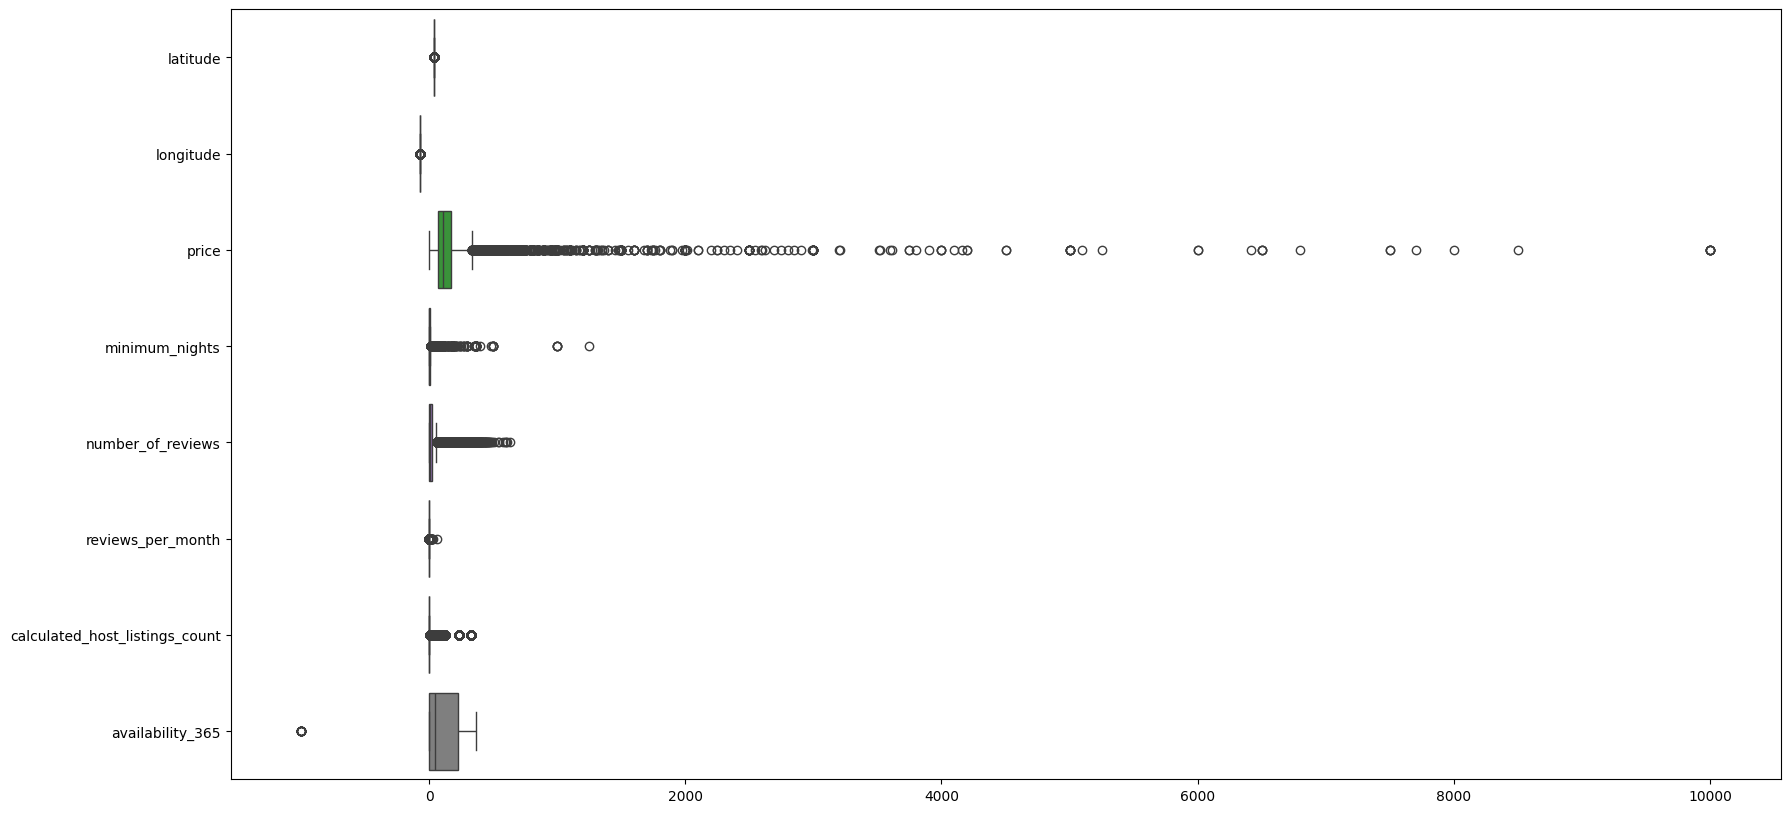

In [8]:
# Ahora si, una vez imputadas las columnas correspondientes, procedemos a hacer un análisis de los outliers
# Lo primero que debemos hacer es plotear boxplots para ver la distribución de las variables.
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h")
plt.show()

In [9]:
# Lo primero que notamos es que la variable "avaibility_365" tiene un valor negativo.
# Entonces, condicionamos a que el valor sea mayor o igual a 0.
df = df[df['availability_365'] >= 0]


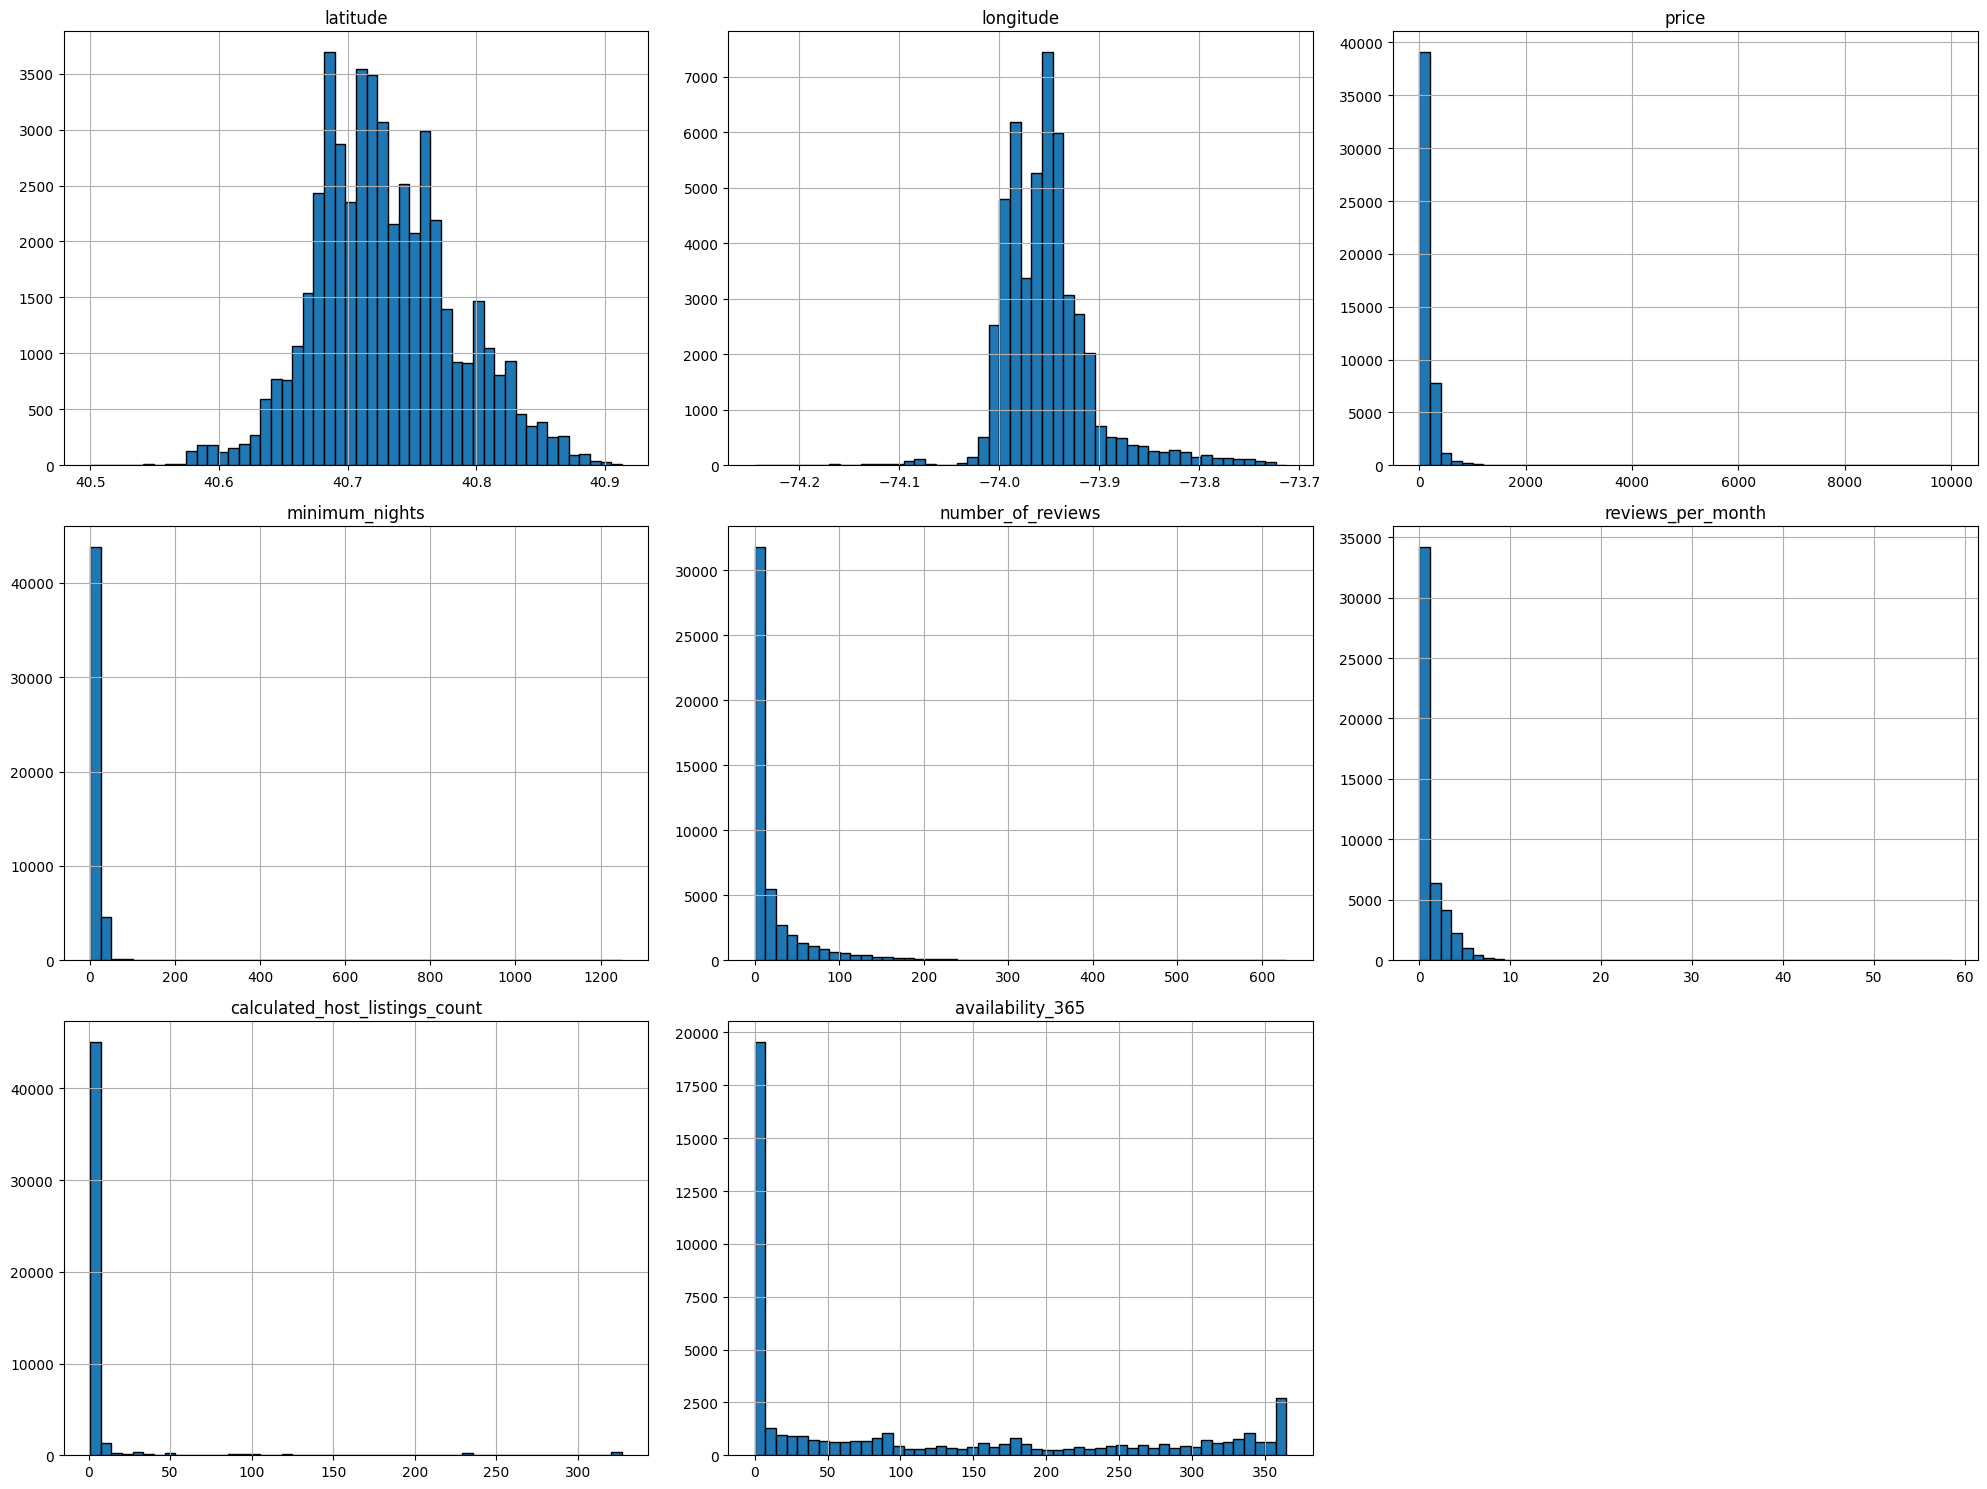

In [10]:
# Otra herramienta útil para ver la distribución de las variables es el histograma.
#El histograma nos permite ver si es necesario transformar alguna variable.
df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()
# Las variables latitude y longitud parecieran seguir una distribución más o menos normal.
# La variable price no nos importa porque es la variable a ser predecida.
# Vemos que 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' tienen muchos ceros. 
# Por lo tanto, vamos a transformar estas variables y luego quitar outliers.
# La variable 'availability_365' la dejamos tal cual como está dado que ya sacamos el valor negativo.


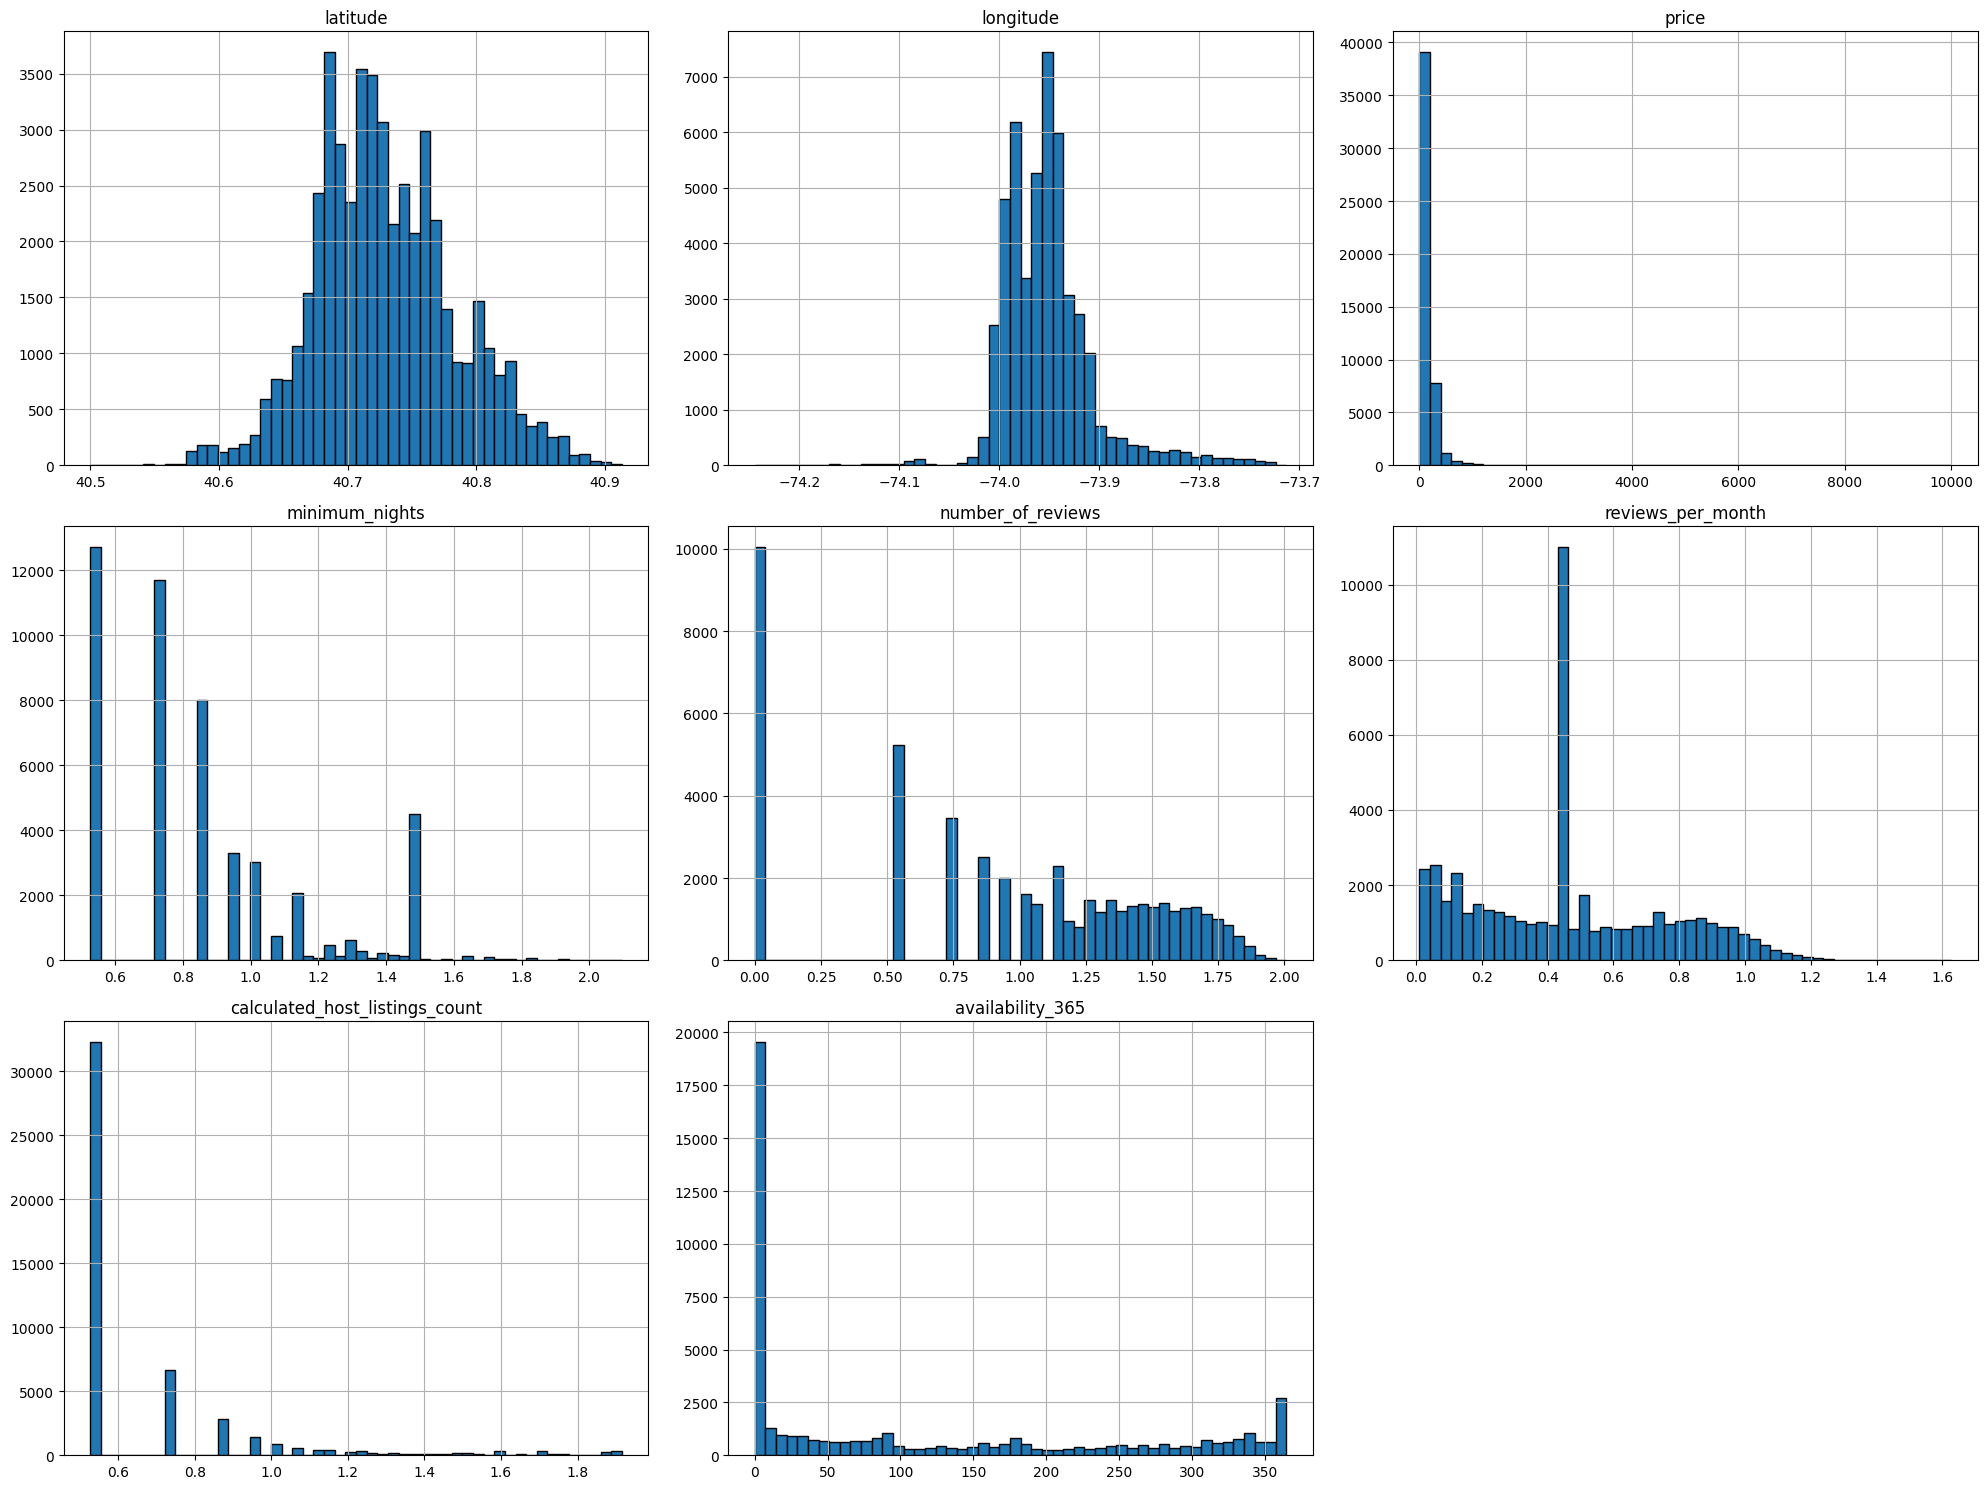

In [13]:
# Apply log transformation to the specified columns
columns_to_transform = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

# Transform the columns using numpy.log
for column in columns_to_transform:
    df[column] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)

df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

In [16]:
# Ahora sí, vamos a proceder a identificar los outliers de cada columna.
# Para ello, vamos a usar el método de la desviación absoluta media (MAD).
# Sin embargo, vamos a quitar la columna de calculated_host_listings_count, dado que esto haría que el análisis de outliers
# haría que eliminemos todos los valores que sean distintos de uno para esta columna, lo cual significaría perder mucha información.
# Import MAD estimator
from pyod.models.mad import MAD

# Se suele utilizar un umbral de 3.5 para considerar que un punto de datos es un outlier.
mad = MAD(threshold = 3.5)
columns_with_outliers = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']

for column in columns_with_outliers:
    # Para calcular el Z-score modificado, primero debemos tranformar las columnas en 2D numpy arrays.
    total_reshaped = df[column].values.reshape(-1, 1)

    # Clasificamos los puntos de datos en outliers (1) y no outliers (0)
    labels = mad.fit(total_reshaped).labels_
    print(f'Outliers for {column}: {np.sum(labels == 1)}')

Outliers for minimum_nights: 314
Outliers for number_of_reviews: 0
Outliers for reviews_per_month: 1


In [17]:
# Por último, filtramos los outliers de cada columna y nos quedamos con un nuevos df.
df_filtrado = df.copy()
df_filtrado = df_filtrado[labels == 0]
df_filtrado.shape
df_filtrado.head()
#Como no quitamos los outliers de la columna 'calculated_host_listings_count', luego vamos a comparar el modelo con y sin esta variable.

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,0.526589,1.194706,0.174474,1.080418,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,0.526589,1.574565,0.279209,0.741276,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,0.869742,0.000000,0.433291,0.526589,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,0.526589,1.887391,1.004259,0.526589,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,1.223156,1.194706,0.091038,0.526589,0


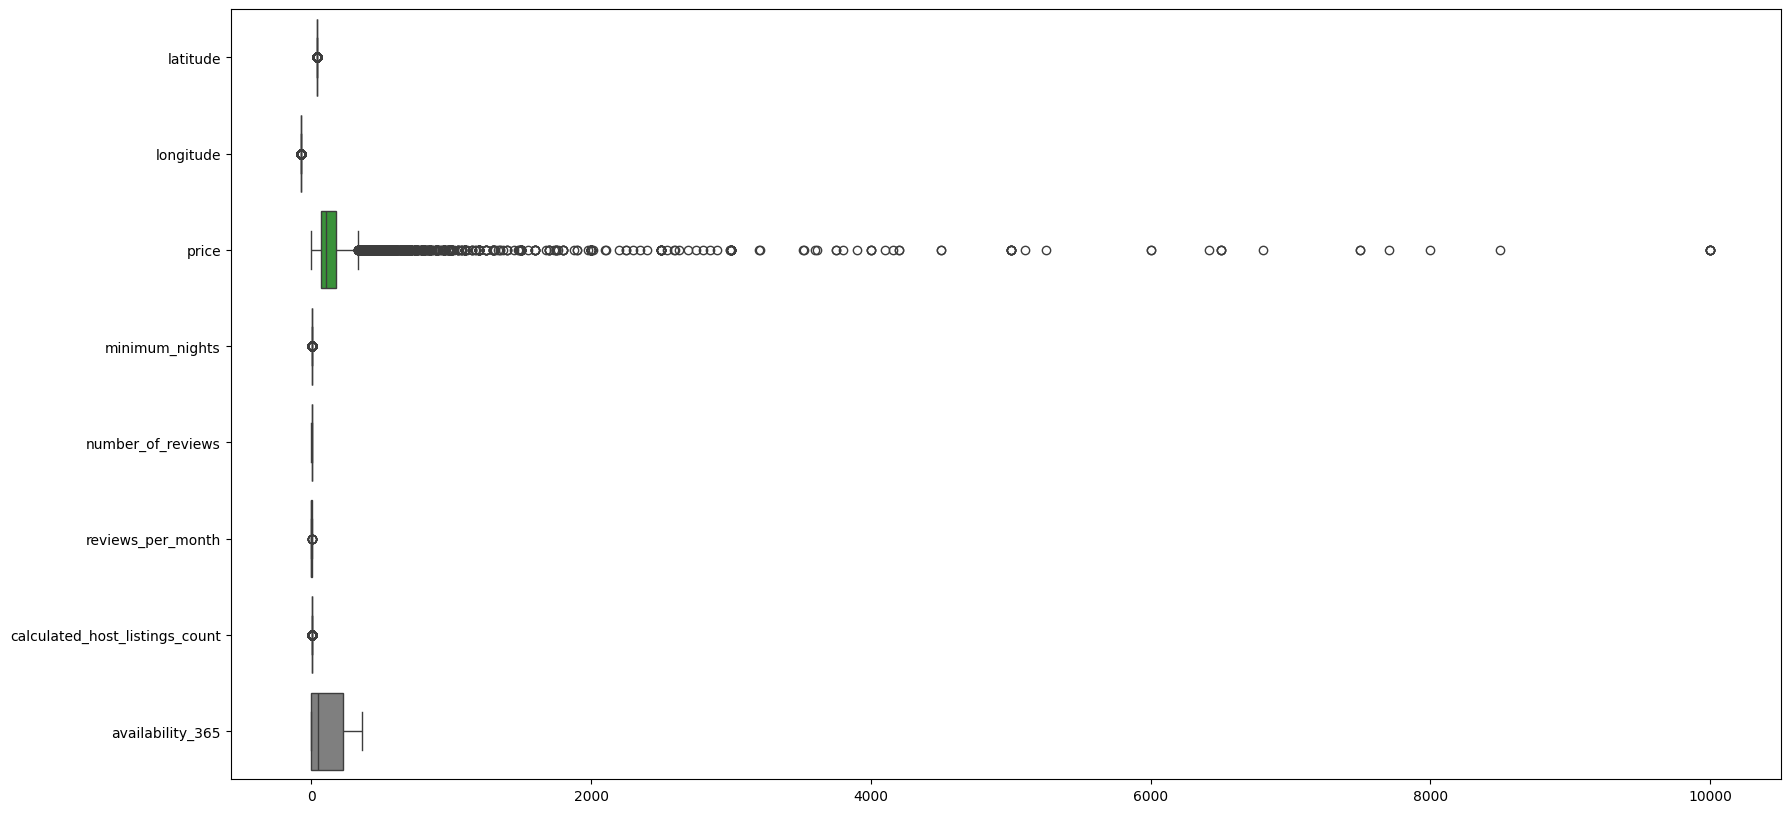

In [18]:
# Vuelvo a plotear una vez más los boxplots para ver si se eliminaron los outliers.
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_filtrado, orient="h")
plt.show()

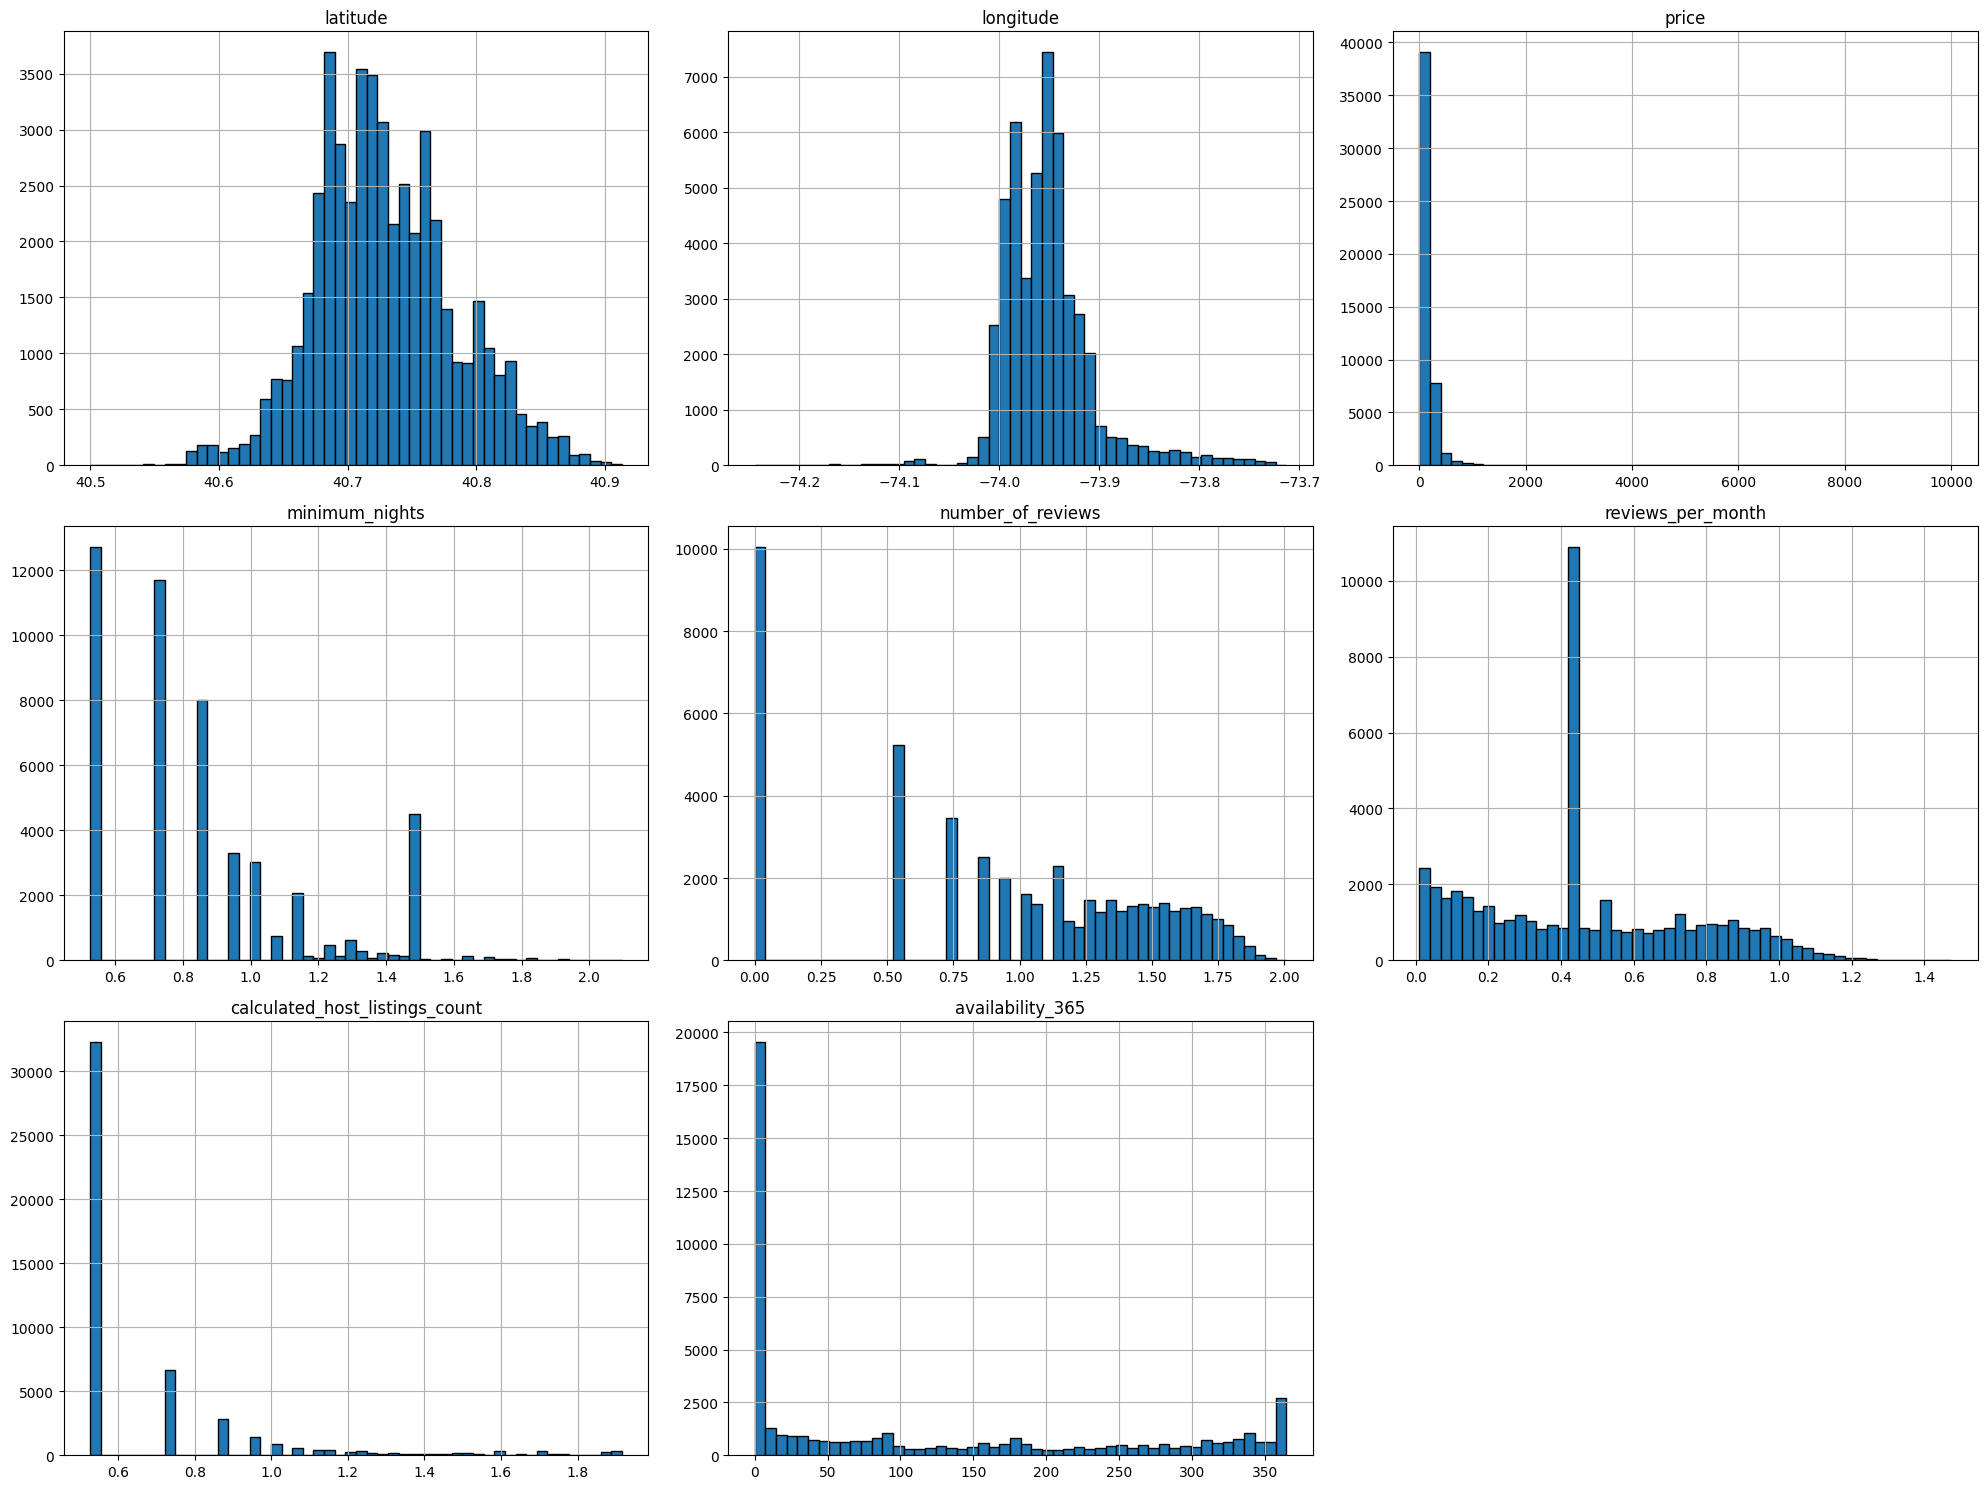

In [19]:
# También vuelvo a plotear los histogramas para ver si se eliminaron los outliers.
df_filtrado.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

#### 5. Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [39]:
# Para transformar las variables, lo primero que tengo que hacer es conocer las distintas categorías que toma cada variable.
# Para ello, uso la función value_counts.
print(df_filtrado['neighbourhood_group'].value_counts())
df_filtrado['room_type'].value_counts()

neighbourhood_group
Manhattan        21658
Brooklyn         20096
Queens            5662
Bronx             1090
Staten Island      373
Name: count, dtype: int64


room_type
Entire home/apt    25401
Private room       22318
Shared room         1160
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

# Transformar las variables 'neighbourhood_group' y 'room_type' a variables numéricas usando LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Transformar 'neighbourhood_group'
df_filtrado['neighbourhood_group'] = label_encoder.fit_transform(df_filtrado['neighbourhood_group'])

# Transformar 'room_type'
df_filtrado['room_type'] = label_encoder.fit_transform(df_filtrado['room_type'])

# Verificar la transformación
df_filtrado.head()

# Ahora Manhattan es 2, Brooklyn es 1, Queens es 3, Bronx es 0 y Staten Island es 4.
# Ahora Entire home/apt es 0, Private room es 1 y Shared room es 2.

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,40.64749,-73.97237,1,149.0,0.526589,1.194706,0.174474,1.080418,365
1,2,40.75362,-73.98377,0,225.0,0.526589,1.574565,0.279209,0.741276,355
2,2,40.80902,-73.94190,1,150.0,0.869742,0.000000,0.433291,0.526589,365
3,1,40.68514,-73.95976,0,89.0,0.526589,1.887391,1.004259,0.526589,194
4,2,40.79851,-73.94399,0,80.0,1.223156,1.194706,0.091038,0.526589,0


#### 6. Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [22]:
# Crear una columna que tenga la cantidad de oferentes por 'neighbourhood_group' llamada 'offer_group'
offer_group = df_filtrado.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Unir la nueva columna al dataframe original
df_filtrado = df_filtrado.merge(offer_group, on='neighbourhood_group', how='left')

# Verificar la nueva columna
df_filtrado.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,1,40.64749,-73.97237,1,149.0,0.526589,1.194706,0.174474,1.080418,365,20096
1,2,40.75362,-73.98377,0,225.0,0.526589,1.574565,0.279209,0.741276,355,21658
2,2,40.80902,-73.94190,1,150.0,0.869742,0.000000,0.433291,0.526589,365,21658
3,1,40.68514,-73.95976,0,89.0,0.526589,1.887391,1.004259,0.526589,194,20096
4,2,40.79851,-73.94399,0,80.0,1.223156,1.194706,0.091038,0.526589,0,21658


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [ ]:
# Resolver acá


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
# Resolver acá


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [1]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [1]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
